<a href="https://colab.research.google.com/github/RIDDHI1624/Drug-Discovery/blob/main/Insulin_Receptor_Project/NPT_Equilibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Short Equilibration — 1ns NPT at 310K
# Picks up from (Energy Minimization) output
# Input: alphafold_champion_minimized.pdb (or run EM from scratch)

!apt-get update -qq
!apt-get install -y -qq gromacs
!gmx --version | head -5

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Preconfiguring packages ...
Selecting previously unselected package sse4.2-support.
(Reading database ... 117540 files and directories currently installed.)
Preparing to unpack .../0-sse4.2-support_6_amd64.deb ...
Unpacking sse4.2-support (6) ...
Selecting previously unselected package fonts-mathjax.
Preparing to unpack .../1-fonts-mathjax_2.7.9+dfsg-1_all.deb ...
Unpacking fonts-mathjax (2.7.9+dfsg-1) ...
Selecting previously unselected package libfftw3-double3:amd64.
Preparing to unpack .../2-libfftw3-double3_3.3.8-2ubuntu8_amd64.deb ...
Unpacking libfftw3-double3:amd64 (3.3.8-2ubuntu8) ...
Selecting previously unselected package libfftw3-single3:amd64.
Preparing to unpack .../3-libfftw3-single3_3.3.8-2ubuntu8_amd64.deb ...
Unpacking libfftw3-single3:amd64 (3.3.8-2ubuntu8) ...
Selecting previously 

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!mkdir -p /content/equilibration
%cd /content/equilibration

Mounted at /content/drive
/content/equilibration


In [3]:
!cp /content/drive/MyDrive/NPT_checkpoint/* /content/equilibration/
!ls -la /content/equilibration/npt.cpt && echo "✓ Checkpoint restored"

-rw------- 1 root root 855620 Feb 26 07:33 /content/equilibration/npt.cpt
✓ Checkpoint restored


In [5]:
%cd /content/equilibration
!gmx mdrun -v -deffnm npt -cpi npt.cpt

/content/equilibration
              :-) GROMACS - gmx mdrun, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter 

In [6]:
!ls -la /content/equilibration/npt.cpt

-rw-r--r-- 1 root root 856476 Feb 26 09:51 /content/equilibration/npt.cpt


In [ ]:
from google.colab import files
print("Upload alphafold_champion.pdb (original structure)")
print("We will re-run minimization here to have all GROMACS files needed\n")
uploaded = files.upload()

Upload alphafold_champion.pdb (original structure)
We will re-run minimization here to have all GROMACS files needed



Saving alphafold_champion.pdb to alphafold_champion.pdb


              :-) GROMACS - gmx energy, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

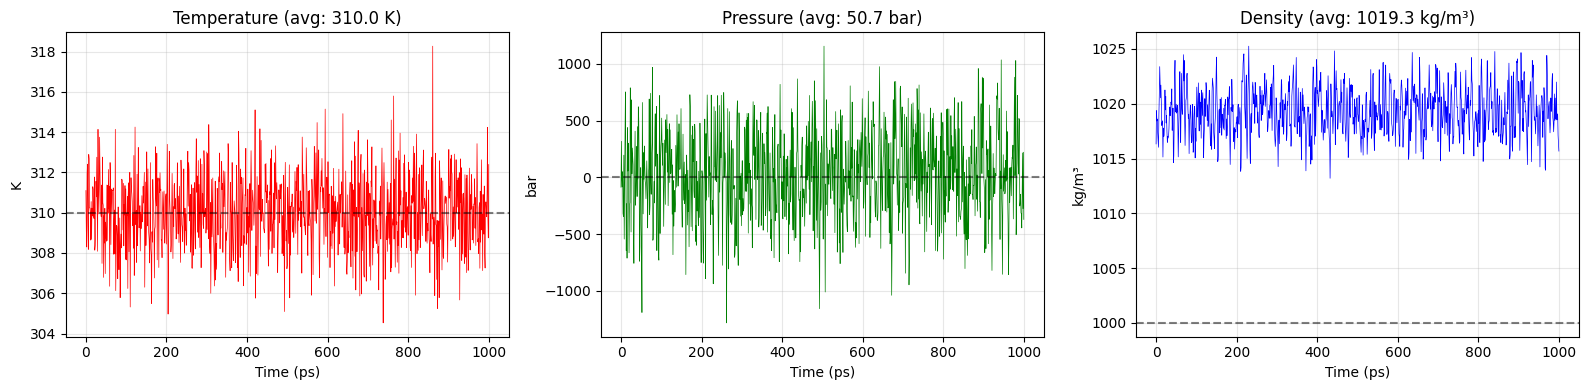


Temperature: 310.0 K (target: 310 ± 5)
Pressure:    50.7 bar (target: ~1, ±200 fluctuation normal)
Density:     1019.3 kg/m³ (target: ~1000 ± 20)


In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Temperature
!echo "16" | gmx energy -f npt.edr -o npt_temp.xvg
t, vals = [], []
with open("npt_temp.xvg") as f:
    for line in f:
        if not line.startswith(("#", "@")):
            p = line.split()
            if len(p) >= 2: t.append(float(p[0])); vals.append(float(p[1]))
axes[0].plot(t, vals, 'r-', lw=0.5)
axes[0].axhline(310, color='k', ls='--', alpha=0.5)
axes[0].set_title(f"Temperature (avg: {np.mean(vals[len(vals)//2:]):.1f} K)")
axes[0].set_xlabel("Time (ps)"); axes[0].set_ylabel("K")
temp_avg = np.mean(vals[len(vals)//2:])

# Pressure
!echo "18" | gmx energy -f npt.edr -o npt_press.xvg
t, vals = [], []
with open("npt_press.xvg") as f:
    for line in f:
        if not line.startswith(("#", "@")):
            p = line.split()
            if len(p) >= 2: t.append(float(p[0])); vals.append(float(p[1]))
axes[1].plot(t, vals, 'g-', lw=0.5)
axes[1].axhline(1, color='k', ls='--', alpha=0.5)
axes[1].set_title(f"Pressure (avg: {np.mean(vals[len(vals)//2:]):.1f} bar)")
axes[1].set_xlabel("Time (ps)"); axes[1].set_ylabel("bar")
press_avg = np.mean(vals[len(vals)//2:])

# Density
!echo "24" | gmx energy -f npt.edr -o npt_dens.xvg
t, vals = [], []
with open("npt_dens.xvg") as f:
    for line in f:
        if not line.startswith(("#", "@")):
            p = line.split()
            if len(p) >= 2: t.append(float(p[0])); vals.append(float(p[1]))
axes[2].plot(t, vals, 'b-', lw=0.5)
axes[2].axhline(1000, color='k', ls='--', alpha=0.5)
axes[2].set_title(f"Density (avg: {np.mean(vals[len(vals)//2:]):.1f} kg/m³)")
axes[2].set_xlabel("Time (ps)"); axes[2].set_ylabel("kg/m³")
dens_avg = np.mean(vals[len(vals)//2:])

for ax in axes: ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("npt_thermodynamics.png", dpi=150)
plt.show()

print(f"\nTemperature: {temp_avg:.1f} K (target: 310 ± 5)")
print(f"Pressure:    {press_avg:.1f} bar (target: ~1, ±200 fluctuation normal)")
print(f"Density:     {dens_avg:.1f} kg/m³ (target: ~1000 ± 20)")

               :-) GROMACS - gmx rms, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Te

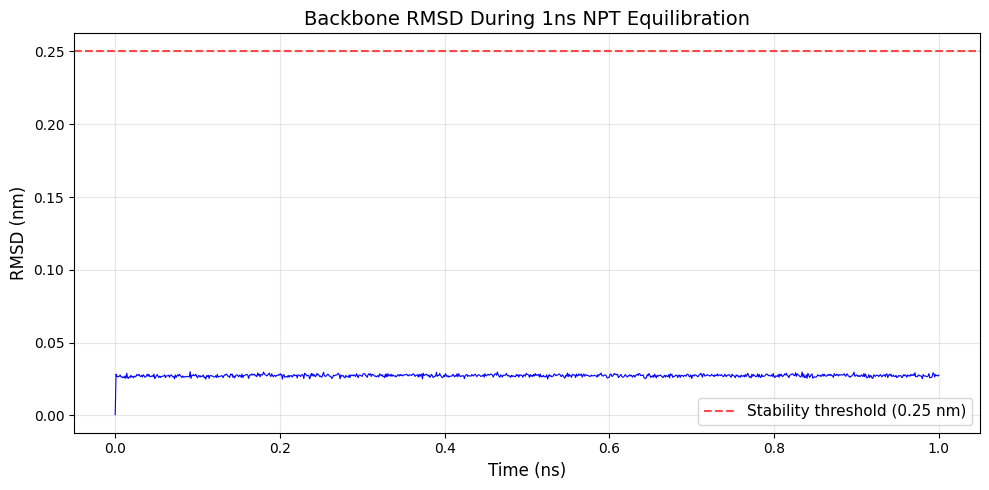

Average RMSD (last 500ps): 0.027 nm (0.27 Å)
Max RMSD: 0.030 nm (0.30 Å)

PASS ✓ — Structure is dynamically STABLE at 310K
Flat RMSD = DFG-out conformation is holding


In [8]:
# RMSD over trajectory
!echo "4 4" | gmx rms -s npt.tpr -f npt.xtc -o rmsd.xvg -tu ns

time_r, rmsd_r = [], []
with open("rmsd.xvg") as f:
    for line in f:
        if not line.startswith(("#", "@")):
            p = line.split()
            if len(p) >= 2:
                time_r.append(float(p[0]))
                rmsd_r.append(float(p[1]))

plt.figure(figsize=(10, 5))
plt.plot(time_r, rmsd_r, 'b-', linewidth=0.8)
plt.axhline(y=0.25, color='r', linestyle='--', alpha=0.7, label='Stability threshold (0.25 nm)')
plt.xlabel("Time (ns)", fontsize=12)
plt.ylabel("RMSD (nm)", fontsize=12)
plt.title("Backbone RMSD During 1ns NPT Equilibration", fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("rmsd_timeseries.png", dpi=150)
plt.show()

import numpy as np
avg_rmsd = np.mean(rmsd_r[len(rmsd_r)//2:])
max_rmsd = max(rmsd_r)
print(f"Average RMSD (last 500ps): {avg_rmsd:.3f} nm ({avg_rmsd*10:.2f} Å)")
print(f"Max RMSD: {max_rmsd:.3f} nm ({max_rmsd*10:.2f} Å)")
print()
if avg_rmsd < 0.25:
    print("PASS ✓ — Structure is dynamically STABLE at 310K")
    print("Flat RMSD = DFG-out conformation is holding")
else:
    print("⚠️ RMSD exceeds threshold. Check if DFG conformation drifted.")

In [9]:
# Extract last frame, center protein, fix periodic boundaries
!echo "1 0" | gmx trjconv -s npt.tpr -f npt.xtc -o alphafold_champion_equilibrated.pdb \
    -pbc mol -center -dump 1000 -ur compact

print("✓ Extracted: alphafold_champion_equilibrated.pdb")
!grep -c "^ATOM" alphafold_champion_equilibrated.pdb

             :-) GROMACS - gmx trjconv, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

In [10]:
import shutil

# Save to Drive
drive_path = "/content/drive/MyDrive/Project_Allostery_Step17/"
!mkdir -p "{drive_path}"

!cp alphafold_champion_equilibrated.pdb "{drive_path}"
!cp rmsd.xvg "{drive_path}"
!cp rmsd_timeseries.png "{drive_path}"
!cp npt_thermodynamics.png "{drive_path}"
!cp em_convergence.png "{drive_path}"
!cp nvt_temperature.png "{drive_path}"

# Download key files
from google.colab import files
files.download("alphafold_champion_equilibrated.pdb")
files.download("rmsd_timeseries.png")
files.download("npt_thermodynamics.png")
files.download("rmsd.xvg")

print()
print("=" * 55)
print("  STEP 17 COMPLETE ✓")
print("=" * 55)
print()
print("  Output: alphafold_champion_equilibrated.pdb")
print("  Saved to Google Drive & downloaded")
print()
print("  ▶ Next: Run Step18_Template_Selection_QC.ipynb")
print("    to verify DFG-out/αC-out held during simulation")
print("=" * 55)

cp: cannot stat 'em_convergence.png': No such file or directory
cp: cannot stat 'nvt_temperature.png': No such file or directory


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


  STEP 17 COMPLETE ✓

  Output: alphafold_champion_equilibrated.pdb
  Saved to Google Drive & downloaded

  ▶ Next: Run Step18_Template_Selection_QC.ipynb
    to verify DFG-out/αC-out held during simulation


In [ ]:
!grep "^ATOM" alphafold_champion.pdb > alphafold_clean.pdb
!echo "Atoms in clean file:"
!grep -c "^ATOM" alphafold_clean.pdb

Atoms in clean file:
2071


In [ ]:
# Run this first to see which number AMBER99SB-ILDN is
!echo "6" | gmx pdb2gmx -f alphafold_clean.pdb -o test.gro -water tip3p -ignh 2>&1 | head -40
!rm -f test.gro topol.top posre.itp 2>/dev/null

             :-) GROMACS - gmx pdb2gmx, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

In [ ]:
# AMBER99SB-ILDN = typically option 6
# Change the echo number if Cell 5 showed a different number
!echo "6" | gmx pdb2gmx -f alphafold_clean.pdb -o processed.gro -water tip3p -ignh
print("\n✓ Topology generated")

             :-) GROMACS - gmx pdb2gmx, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

In [ ]:
# Dodecahedral box with 1.0 nm padding
!gmx editconf -f processed.gro -o boxed.gro -c -d 1.0 -bt dodecahedron

# Solvate
!gmx solvate -cp boxed.gro -cs spc216.gro -o solvated.gro -p topol.top

# Create ions.mdp
with open("ions.mdp", "w") as f:
    f.write("""; ions.mdp - for genion
integrator  = steep
emtol       = 1000.0
emstep      = 0.01
nsteps      = 50000
nstlist     = 1
cutoff-scheme = Verlet
ns_type     = grid
coulombtype = PME
rcoulomb    = 1.0
rvdw        = 1.0
pbc         = xyz
""")

# Add ions: neutralize + 150 mM NaCl
!gmx grompp -f ions.mdp -c solvated.gro -p topol.top -o ions.tpr -maxwarn 1
!echo "SOL" | gmx genion -s ions.tpr -o ionized.gro -p topol.top -pname NA -nname CL -neutral -conc 0.15

print("\n✓ System prepared: protein + water + 150 mM NaCl")

             :-) GROMACS - gmx editconf, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff           

In [ ]:
with open("em.mdp", "w") as f:
    f.write("""; em.mdp - Energy Minimization
integrator  = steep
emtol       = 1000.0
emstep      = 0.01
nsteps      = 5000

nstlist         = 1
cutoff-scheme   = Verlet
ns_type         = grid
coulombtype     = PME
rcoulomb        = 1.0
rvdw            = 1.0
pbc             = xyz

; AMBER force field needs this
DispCorr        = EnerPres
""")

!gmx grompp -f em.mdp -c ionized.gro -p topol.top -o em.tpr
!gmx mdrun -v -deffnm em

print("\n✓ Energy minimization complete")

              :-) GROMACS - gmx grompp, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

              :-) GROMACS - gmx energy, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

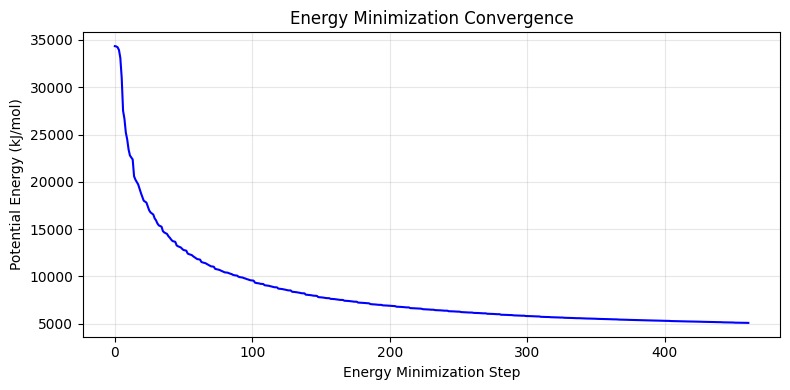

Final energy: 5091 kJ/mol
Energy drift in last 10%: 155 kJ/mol
✓ Energy converged (plateaued)


In [ ]:
!echo "10" | gmx energy -f em.edr -o em_potential.xvg

import matplotlib.pyplot as plt

steps, energy = [], []
with open("em_potential.xvg") as f:
    for line in f:
        if not line.startswith(("#", "@")):
            parts = line.split()
            if len(parts) >= 2:
                steps.append(float(parts[0]))
                energy.append(float(parts[1]))

plt.figure(figsize=(8, 4))
plt.plot(steps, energy, 'b-')
plt.xlabel("Energy Minimization Step")
plt.ylabel("Potential Energy (kJ/mol)")
plt.title("Energy Minimization Convergence")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("em_convergence.png", dpi=150)
plt.show()

print(f"Final energy: {energy[-1]:.0f} kJ/mol")

# Check if energy plateaued (converged) rather than just checking if negative
if len(energy) > 10:
    last_10_pct = energy[int(len(energy)*0.9):]
    drift = abs(last_10_pct[-1] - last_10_pct[0])
    print(f"Energy drift in last 10%: {drift:.0f} kJ/mol")
    if drift < 1000:
        print("✓ Energy converged (plateaued)")
    else:
        print("⚠️ Energy still dropping — consider more steps")

In [ ]:
with open("nvt.mdp", "w") as f:
    f.write("""; nvt.mdp - 100ps NVT equilibration at 310K
; PURPOSE: Stabilize temperature before pressure coupling

define      = -DPOSRES      ; Position restrain protein

; Run parameters
integrator  = md
nsteps      = 50000         ; 100 ps (50000 × 2fs)
dt          = 0.002         ; 2 fs timestep

; Output control
nstxout-compressed = 500    ; Save coordinates every 1 ps
nstlog      = 500
nstenergy   = 500

; Bond parameters
continuation    = no        ; First run - generate velocities
constraint_algorithm = lincs
constraints     = h-bonds
lincs_iter      = 1
lincs_order     = 4

; Neighbor searching
cutoff-scheme   = Verlet
nstlist         = 10
rcoulomb        = 1.0
rvdw            = 1.0

; Electrostatics
coulombtype     = PME
pme_order       = 4
fourierspacing  = 0.16

; Temperature coupling
tcoupl      = V-rescale
tc-grps     = Protein Non-Protein
tau_t       = 0.1     0.1
ref_t       = 310     310

; Pressure coupling OFF for NVT
pcoupl      = no

; PBC
pbc         = xyz

; Dispersion correction for AMBER
DispCorr    = EnerPres

; Velocity generation
gen_vel     = yes
gen_temp    = 310
gen_seed    = -1
""")

print("✓ nvt.mdp created (100ps at 310K, position restraints ON)")

✓ nvt.mdp created (100ps at 310K, position restraints ON)


In [ ]:
!gmx grompp -f nvt.mdp -c em.gro -r em.gro -p topol.top -o nvt.tpr

print("Starting NVT equilibration (100ps)...")
print("This takes ~15-30 minutes on Colab CPU\n")

!gmx mdrun -v -deffnm nvt

print("\n✓ NVT equilibration complete")

              :-) GROMACS - gmx grompp, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

              :-) GROMACS - gmx energy, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

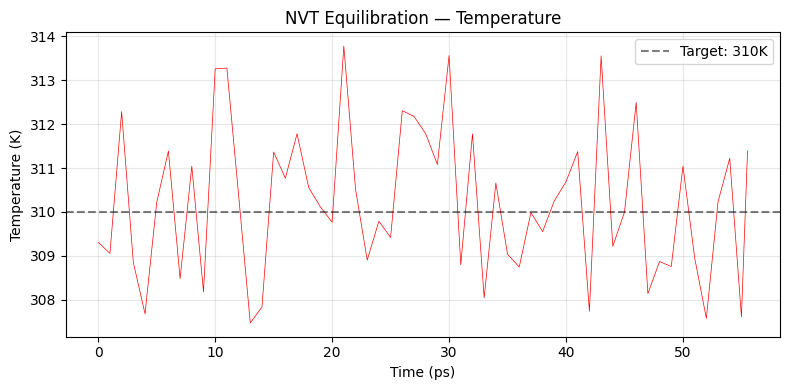

Average temperature (last 50ps): 310.1 K
Target: 310 ± 5 K
PASS ✓ — Temperature stable, proceed to NPT


In [ ]:
!echo "16" | gmx energy -f nvt.edr -o nvt_temperature.xvg

time_t, temp = [], []
with open("nvt_temperature.xvg") as f:
    for line in f:
        if not line.startswith(("#", "@")):
            parts = line.split()
            if len(parts) >= 2:
                time_t.append(float(parts[0]))
                temp.append(float(parts[1]))

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 4))
plt.plot(time_t, temp, 'r-', linewidth=0.5)
plt.axhline(y=310, color='k', linestyle='--', alpha=0.5, label='Target: 310K')
plt.xlabel("Time (ps)")
plt.ylabel("Temperature (K)")
plt.title("NVT Equilibration — Temperature")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("nvt_temperature.png", dpi=150)
plt.show()

avg_temp = np.mean(temp[len(temp)//2:])  # Average second half
print(f"Average temperature (last 50ps): {avg_temp:.1f} K")
print(f"Target: 310 ± 5 K")
if abs(avg_temp - 310) < 5:
    print("PASS ✓ — Temperature stable, proceed to NPT")
else:
    print("⚠️ Temperature not converged. May need longer NVT.")

In [ ]:
%cd /content/equilibration
!echo "--- Checking all files ---"
!ls -la npt.tpr 2>/dev/null && echo "✓ npt.tpr EXISTS" || echo "✗ npt.tpr MISSING — Cell 14 failed"
!ls -la nvt.gro 2>/dev/null && echo "✓ nvt.gro EXISTS" || echo "✗ nvt.gro MISSING"
!ls -la nvt.cpt 2>/dev/null && echo "✓ nvt.cpt EXISTS" || echo "✗ nvt.cpt MISSING"
!ls -la topol.top 2>/dev/null && echo "✓ topol.top EXISTS" || echo "✗ topol.top MISSING"
!ls -la npt.mdp 2>/dev/null && echo "✓ npt.mdp EXISTS" || echo "✗ npt.mdp MISSING"

/content/equilibration
--- Checking all files ---
✗ npt.tpr MISSING — Cell 14 failed
✗ nvt.gro MISSING
-rw-r--r-- 1 root root 856464 Feb 25 07:44 nvt.cpt
✓ nvt.cpt EXISTS
-rw-r--r-- 1 root root 1161114 Feb 25 07:08 topol.top
✓ topol.top EXISTS
-rw-r--r-- 1 root root 1188 Feb 25 07:50 npt.mdp
✓ npt.mdp EXISTS


In [ ]:
%cd /content/equilibration

# Cell 14+15 combined: Prepare AND run NPT
!gmx grompp -f npt.mdp -c nvt.gro -r nvt.gro -t nvt.cpt -p topol.top -o npt.tpr -maxwarn 1

# Verify tpr was created before running
import os
if os.path.exists("npt.tpr"):
    print("✓ npt.tpr created successfully")
    print("Starting 1ns NPT simulation (3-6 hours)...\n")
    !gmx mdrun -v -deffnm npt
    print("\n✓ NPT EQUILIBRATION COMPLETE")
else:
    print("✗ npt.tpr was NOT created!")
    print("Check the grompp error messages above")

/content/equilibration
              :-) GROMACS - gmx grompp, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter

In [ ]:
%cd /content/equilibration

# Extract final structure from NVT
!echo "0" | gmx trjconv -s nvt.tpr -f nvt.trr -o nvt.gro -dump -1 2>/dev/null || \
!echo "0" | gmx trjconv -s nvt.tpr -f nvt.xtc -o nvt.gro -dump -1 2>/dev/null || \
echo "Trying alternative..."

# If above didn't work, use editconf on the checkpoint
!ls nvt.gro 2>/dev/null && echo "✓ nvt.gro created" || \
!gmx convert-tpr -s nvt.tpr -o nvt_temp.tpr && \
!echo "0" | gmx trjconv -s nvt.tpr -f nvt.cpt -o nvt.gro 2>/dev/null

# Final check
!ls -la nvt.gro 2>/dev/null && echo "✓ nvt.gro EXISTS now" || echo "✗ Still missing, trying last resort..."

/content/equilibration
/bin/bash: line 1: !echo: command not found
Note that major changes are planned in future for trjconv, to improve usability and utility.
Select group for output
Trying alternative...
/bin/bash: line 1: !gmx: command not found
✗ Still missing, trying last resort...


In [ ]:
!ls -la /content/equilibration/nvt.*

-rw-r--r-- 1 root root  856464 Feb 25 07:44 /content/equilibration/nvt.cpt
-rw-r--r-- 1 root root   33532 Feb 25 07:44 /content/equilibration/nvt.edr
-rw-r--r-- 1 root root   59568 Feb 25 07:44 /content/equilibration/nvt.log
-rw-r--r-- 1 root root    1116 Feb 25 07:13 /content/equilibration/nvt.mdp
-rw-r--r-- 1 root root 2087888 Feb 25 07:13 /content/equilibration/nvt.tpr
-rw-r--r-- 1 root root 7315908 Feb 25 07:44 /content/equilibration/nvt.xtc


In [ ]:
!echo "0" | gmx trjconv -s /content/equilibration/nvt.tpr -f /content/equilibration/nvt.xtc -o /content/equilibration/nvt.gro -dump -1

             :-) GROMACS - gmx trjconv, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

In [ ]:
%cd /content/equilibration
!gmx grompp -f npt.mdp -c nvt.gro -r nvt.gro -t nvt.cpt -p topol.top -o npt.tpr -maxwarn 1
!ls -la npt.tpr && echo "✓ npt.tpr created — ready to run"

/content/equilibration
              :-) GROMACS - gmx grompp, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter

In [ ]:
!gmx mdrun -v -deffnm npt

              :-) GROMACS - gmx mdrun, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            T

In [ ]:
!mkdir -p /content/drive/MyDrive/NPT_checkpoint/
!cp /content/equilibration/npt.* /content/drive/MyDrive/NPT_checkpoint/
!cp /content/equilibration/topol.top /content/drive/MyDrive/NPT_checkpoint/
!cp /content/equilibration/*.itp /content/drive/MyDrive/NPT_checkpoint/ 2>/dev/null
!cp /content/equilibration/nvt.* /content/drive/MyDrive/NPT_checkpoint/
!cp /content/equilibration/em.* /content/drive/MyDrive/NPT_checkpoint/
!ls -la /content/drive/MyDrive/NPT_checkpoint/npt.cpt && echo "✓ Checkpoint saved"

-rw------- 1 root root 855620 Feb 25 14:14 /content/drive/MyDrive/NPT_checkpoint/npt.cpt
✓ Checkpoint saved
